In [2]:
import pandas as pd

df = pd.read_csv("biopsy.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = df.drop(['id', 'diagnosis'], axis=1)
y = df['diagnosis']
y = y.replace("M", 1)
y = y.replace("B", 0)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\harry\AppData\Local\Temp\ipykernel_12520\753936943.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace("B", 0)


In [4]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [5]:
y_pred = knn.predict(X_test)

c:\Users\harry\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\harry\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [6]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9736842105263158


In [7]:
from sklearn.metrics import f1_score

accuracy = f1_score(y_test, y_pred)
print("F1:", accuracy)

F1: 0.967741935483871


In [8]:
from sklearn.metrics import cohen_kappa_score

accuracy = cohen_kappa_score(y_test, y_pred)
print("Cohen Kappa:", accuracy)

Cohen Kappa: 0.9455587392550143


# TESTING STUFF

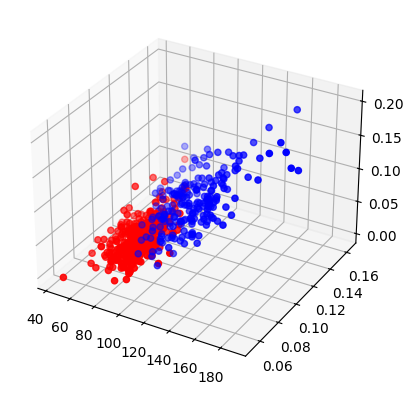

In [9]:
selected_features = ['perimeter_mean', 'smoothness_mean', 'concave points_mean']

"""for fun only - graphing to see points"""

import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

my_cmap = plt.get_cmap('hsv')

X_m = [[], [], []]
X_b = [[], [], []]
for i in range(len(list(df['diagnosis']))):
    if list(df['diagnosis'])[i] == 'M':
        X_m[0].append(df[selected_features[0]][i])
        X_m[1].append(df[selected_features[1]][i])
        X_m[2].append(df[selected_features[2]][i])
    else:
        X_b[0].append(df[selected_features[0]][i])
        X_b[1].append(df[selected_features[1]][i])
        X_b[2].append(df[selected_features[2]][i])

ax.scatter(X_m[0], X_m[1], X_m[2], color="blue")
ax.scatter(X_b[0], X_b[1], X_b[2], color="red")

